# QUELLE ÉVOLUTION DES RÉSERVATIONS À LA MÉDIATHÈQUE ?

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,date
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

from kiblib.utils.db import DbConn
from kiblib.utils.evolution_stats import EvolutionActivite
from kiblib.utils import lucas_sns_params

import warnings
warnings.filterwarnings("ignore")

In [2]:
db_conn = DbConn().create_engine()

In [3]:
query= """SELECT reservedate,borrowernumber
FROM statdb.stat_reserves sr 
WHERE YEAR(reservedate) >= '2019'
AND branchcode = 'MED'"""

In [4]:
resas_med = pd.read_sql(query,db_conn)

In [5]:
df = EvolutionActivite(df=resas_med,df_subject='resas_mediatheque',text="réservations")

In [6]:
df.add_columns()

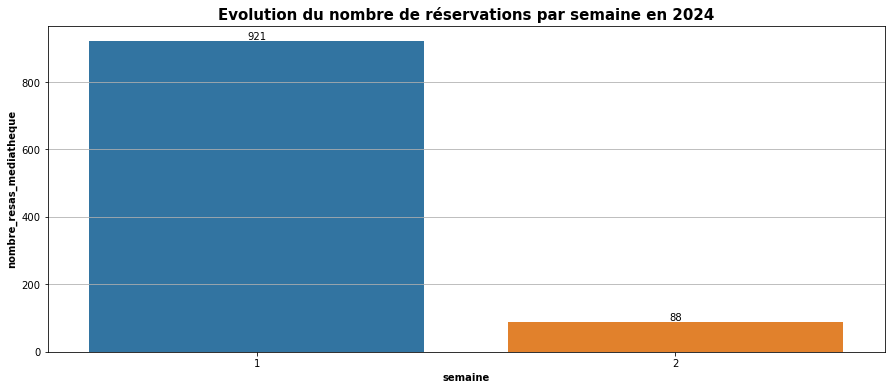

In [7]:
ax = sns.barplot(data=df.evolution_byweek_thisyear(),x='semaine',y='nombre_resas_mediatheque')
ax.set_title(df.titre_graph1())

for i in ax.containers:
    ax.bar_label(i,)

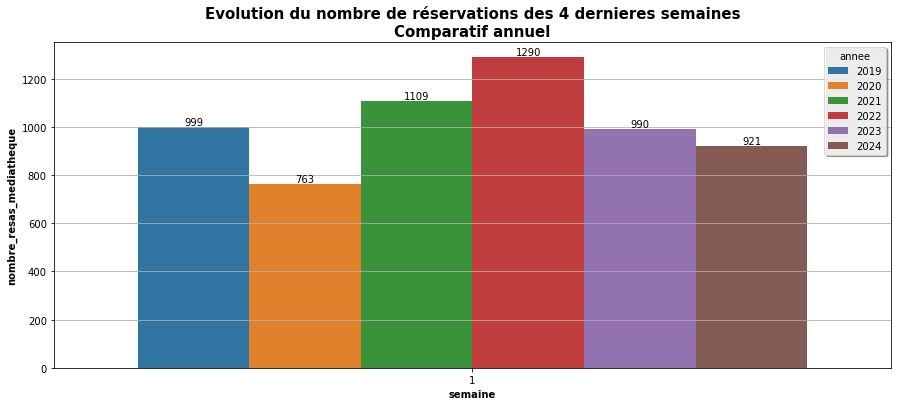

In [8]:
ax = sns.barplot(data=df.evolution_4lastweek(),x='semaine',y='nombre_resas_mediatheque',hue='annee')
ax.set_title(df.titre_graph2())

for i in ax.containers:
    ax.bar_label(i,)

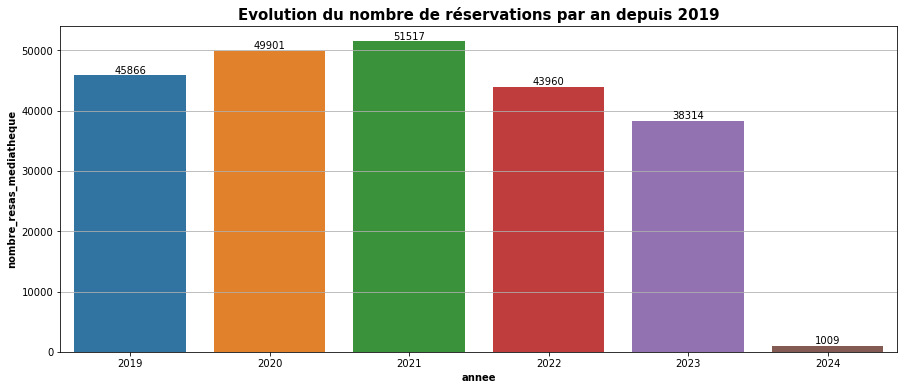

In [9]:
ax = sns.barplot(data=df.evolution_by_year(),x='annee',y='nombre_resas_mediatheque')
ax.set_title(df.titre_graph3())

for i in ax.containers:
    ax.bar_label(i,)